## Find Elbow Point


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple, Union, List
import logging

import pandas as pd
from sentence_transformers import SentenceTransformer

c:\Users\Chris\anaconda3\envs\bertopic_39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
def find_optimal_clusters(
    embeddings: np.ndarray,
    min_k: int = 2,
    max_k: int = 100,
    plot: bool = True,
    save_plot: bool = False,
    plot_path: str = 'elbow_plot.png'
) -> Tuple[int, List[float]]:
    """
    Find the optimal number of clusters using the elbow method.
    
    Args:
        embeddings (np.ndarray): The embedding vectors to cluster
        min_k (int): Minimum number of clusters to try
        max_k (int): Maximum number of clusters to try
        plot (bool): Whether to display the elbow plot
        save_plot (bool): Whether to save the plot to a file
        plot_path (str): Path where to save the plot if save_plot is True
    
    Returns:
        Tuple[int, List[float]]: Optimal number of clusters and list of inertias
    """
    try:
        # Validate inputs
        if min_k < 2:
            raise ValueError("min_k must be at least 2")
        if max_k <= min_k:
            raise ValueError("max_k must be greater than min_k")
        
        print(f"Calculating optimal clusters from k={min_k} to k={max_k}")
        
        # Calculate inertia for different values of k
        inertias = []
        K = range(min_k, max_k + 1)
        
        for k in K:
            print(f"Testing k={k}")
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(embeddings)
            inertias.append(kmeans.inertia_)
        
        # Find the elbow point
        kn = KneeLocator(
            K, 
            inertias,
            curve='convex',
            direction='decreasing'
        )
        optimal_k = kn.elbow
        
        if optimal_k is None:
           print("Could not automatically detect elbow point. Using middle value.")
           optimal_k = (max_k + min_k) // 2
        
        # Create and optionally save the plot
        if plot or save_plot:
            plt.figure(figsize=(10, 6))
            plt.plot(K, inertias, 'bx-')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method For Optimal k')
            
            # Mark the elbow point
            plt.plot(optimal_k, inertias[optimal_k - min_k], 'ro')
            plt.annotate(f'Elbow Point (k={optimal_k})',
                        xy=(optimal_k, inertias[optimal_k - min_k]),
                        xytext=(10, 10),
                        textcoords='offset points')
            
            if save_plot:
                plt.savefig(plot_path)
                print(f"Saved elbow plot to {plot_path}")
            
            if plot:
                plt.show()
            
            plt.close()
        
        print(f"Optimal number of clusters found: {optimal_k}")
        return optimal_k, inertias
        
    except Exception as e:
        print(f"Error in find_optimal_clusters: {str(e)}")
        raise

def get_cluster_sizes(kmeans_model: KMeans, embeddings: np.ndarray) -> dict:
    """
    Get the size of each cluster.
    """
    try:
        labels = kmeans_model.predict(embeddings)
        unique, counts = np.unique(labels, return_counts=True)
        return dict(zip(unique, counts))
    except Exception as e:
        print(f"Error in get_cluster_sizes: {str(e)}")
        raise

def load_and_prepare_data(file_path: str) -> np.ndarray:
    """
    Load and prepare data for clustering from Excel file.
    """
    try:
        # Load data
        print(f"Loading data from {file_path}")
        df = pd.read_excel(file_path)
        
        # Combine abstract and content if both exist
        texts = df['abstract_content_clean_en'].tolist()
        
        # Initialize BERT model
        print("Initializing BERT model")
        model = SentenceTransformer('avsolatorio/GIST-small-Embedding-v0')
        
        # Create embeddings
        print("Creating embeddings")
        embeddings = model.encode(texts, show_progress_bar=True)
        
        return embeddings
        
    except Exception as e:
        print(f"Error in load_and_prepare_data: {str(e)}")
        raise

Starting data preparation
Loading data from data/archives_articles_contents.xlsx
Initializing BERT model
Creating embeddings


Batches: 100%|██████████| 76/76 [05:45<00:00,  4.54s/it]


Finding optimal number of clusters
Calculating optimal clusters from k=2 to k=150
Testing k=2
Testing k=3
Testing k=4
Testing k=5
Testing k=6
Testing k=7
Testing k=8
Testing k=9
Testing k=10
Testing k=11
Testing k=12
Testing k=13
Testing k=14
Testing k=15
Testing k=16
Testing k=17
Testing k=18
Testing k=19
Testing k=20
Testing k=21
Testing k=22
Testing k=23
Testing k=24
Testing k=25
Testing k=26
Testing k=27
Testing k=28
Testing k=29
Testing k=30
Testing k=31
Testing k=32
Testing k=33
Testing k=34
Testing k=35
Testing k=36
Testing k=37
Testing k=38
Testing k=39
Testing k=40
Testing k=41
Testing k=42
Testing k=43
Testing k=44
Testing k=45
Testing k=46
Testing k=47
Testing k=48
Testing k=49
Testing k=50
Testing k=51
Testing k=52
Testing k=53
Testing k=54
Testing k=55
Testing k=56
Testing k=57
Testing k=58
Testing k=59
Testing k=60
Testing k=61
Testing k=62
Testing k=63
Testing k=64
Testing k=65
Testing k=66
Testing k=67
Testing k=68
Testing k=69
Testing k=70
Testing k=71
Testing k=72
Tes

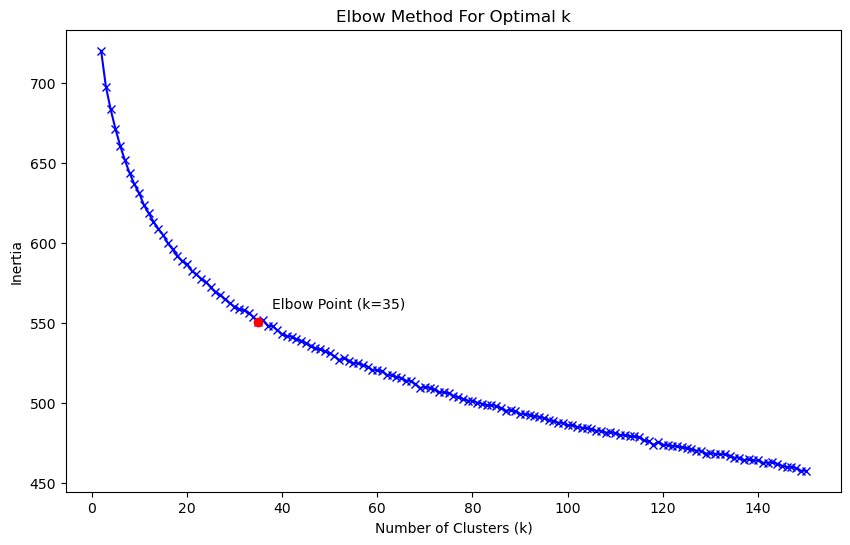

Optimal number of clusters found: 35
Fitting KMeans with optimal k=35

CLUSTERING RESULTS

Optimal number of clusters: 35

Cluster sizes:
Cluster 0: 100 documents
Cluster 1: 90 documents
Cluster 2: 79 documents
Cluster 3: 79 documents
Cluster 4: 83 documents
Cluster 5: 34 documents
Cluster 6: 100 documents
Cluster 7: 52 documents
Cluster 8: 46 documents
Cluster 9: 54 documents
Cluster 10: 92 documents
Cluster 11: 60 documents
Cluster 12: 47 documents
Cluster 13: 69 documents
Cluster 14: 54 documents
Cluster 15: 49 documents
Cluster 16: 86 documents
Cluster 17: 87 documents
Cluster 18: 58 documents
Cluster 19: 63 documents
Cluster 20: 73 documents
Cluster 21: 81 documents
Cluster 22: 59 documents
Cluster 23: 37 documents
Cluster 24: 102 documents
Cluster 25: 65 documents
Cluster 26: 57 documents
Cluster 27: 93 documents
Cluster 28: 79 documents
Cluster 29: 37 documents
Cluster 30: 79 documents
Cluster 31: 36 documents
Cluster 32: 65 documents
Cluster 33: 105 documents
Cluster 34: 63 doc

In [4]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Constants (adjust these values as needed)
DATA_PATH = 'data/archives_articles_contents.xlsx'
MIN_K = 2            # Minimum number of clusters to try
MAX_K = 150          # Maximum number of clusters to try
OUTPUT_DIR = 'results'
PLOT = True          # Whether to show the elbow plot

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load and prepare data
print("Starting data preparation")
embeddings = load_and_prepare_data(DATA_PATH)

# Find optimal clusters
print("Finding optimal number of clusters")
optimal_k, inertias = find_optimal_clusters(
    embeddings,
    min_k=MIN_K,
    max_k=MAX_K,
    plot=PLOT,
    save_plot=False  # Do not save the plot, we'll display it instead
)

# Display the plot inline
plt.show()

# Fit KMeans with optimal k
print(f"Fitting KMeans with optimal k={optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(embeddings)

# Get cluster sizes
cluster_sizes = get_cluster_sizes(kmeans, embeddings)

# Display clustering results
print("\n" + "="*50)
print("CLUSTERING RESULTS")
print("="*50)
print(f"\nOptimal number of clusters: {optimal_k}")
print("\nCluster sizes:")
for cluster, size in sorted(cluster_sizes.items()):
    print(f"Cluster {cluster}: {size} documents")
print("\n" + "="*50)

# Save results to file
try:
    results_path = os.path.join(OUTPUT_DIR, 'clustering_results.txt')
    print(f"Saving results to {results_path}")
    with open(results_path, 'w') as f:
        f.write(f"Optimal number of clusters: {optimal_k}\n\n")
        f.write("Cluster sizes:\n")
        for cluster, size in sorted(cluster_sizes.items()):
            f.write(f"Cluster {cluster}: {size} documents\n")
    print(f"Results saved successfully to {results_path}")
except Exception as e:
    print(f"Error saving results to file: {str(e)}")

print("Process completed successfully")
